# Differentiable Optimization of Similarity Scores

<a href="https://colab.research.google.com/github/nacloos/diffscore/blob/master/examples/optimize-similarity-scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from diffscore import pipeline_optim_score

In [3]:
dataset = "Mante2013"

In [4]:
pipeline_optim_score(
    dataset=dataset,
    measure="cka-hsic_song",
    stop_score=0.99,
)
plt.show()

fit_measure is deprecated, use optimize instead
Iter 0, score: 0.0010973571334034204
Iter 10, score: 0.9658373594284058
Iter 20, score: 0.9807984828948975
Iter 30, score: 0.9865196943283081
Iter 40, score: 0.9893336296081543
Final score 0.990021824836731
0.6836521727051713 0.683652170795136
0.6814335734594412 0.6814335744813041
0.677872356119317 0.6778723564620663


KeyboardInterrupt: 

Iter 0, similarity: 0.0744730110519805
Iter 10, similarity: 0.9660005364585884
Iter 20, similarity: 0.9803151615857829
Iter 30, similarity: 0.986254654051181
Iter 40, similarity: 0.9892441237157419
Final score 0.9900283671702398


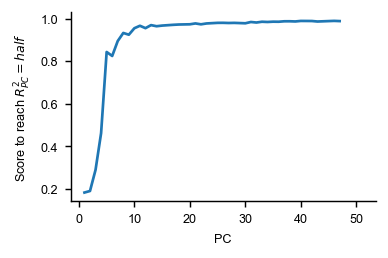

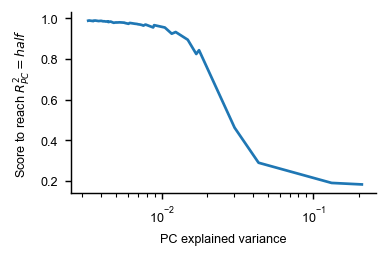

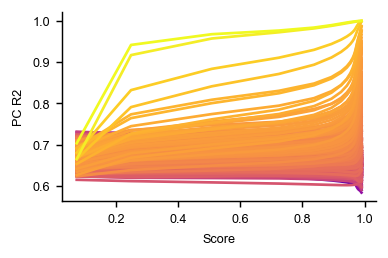

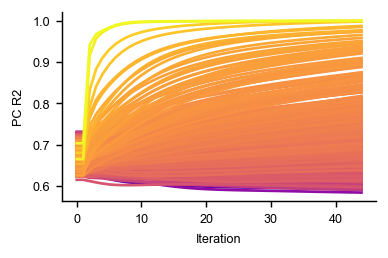

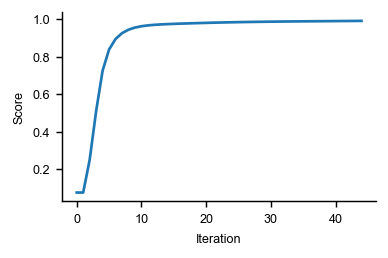

In [ ]:
pipeline_optim_score(
    dataset=dataset,
    measure="cka",
    stop_score=0.99,
    decoding_analysis=False
)
plt.show()

### Optimization dynamics predicted by spectrum-matched Gaussian

We found that replacing the neural dataset by a Gaussian dataset with same spectrum produces very similar optimization dynamics.

In [ ]:
from diffscore import Dataset

# dataset = "Mante2013"
dataset = "ultrametric"

# load the dataset (this might take a couple of seconds)
X, conditions = Dataset(dataset)

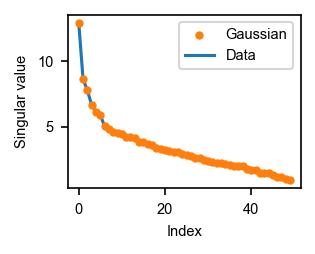

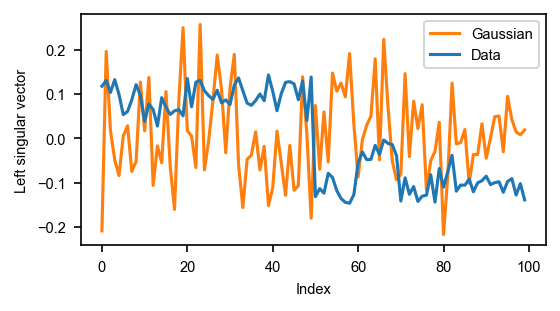

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

if X.ndim == 3:
    # reshape from (time, trial, neuron) to (time * trial, neuron)
    _X = X.reshape(X.shape[0] * X.shape[1], X.shape[2])
else:
    _X = X
# center the data
_X -= _X.mean(axis=0)
# compute the singular value decomposition of the data
U, S, V = np.linalg.svd(_X, full_matrices=False)

# create a gaussian dataset with the same singular values
Y = np.random.randn(*_X.shape)
U_Y, S_Y, Vt_Y = np.linalg.svd(Y, full_matrices=False)
X_gaussian = U_Y @ np.diag(S) @ Vt_Y

# plot the singular values
plt.figure(figsize=(2, 1.5), dpi=150)
plt.scatter(range(len(S)), np.linalg.svd(X_gaussian, full_matrices=False)[1], label="Gaussian", marker=".", color="tab:orange")
plt.plot(S, label="Data", zorder=-1)
plt.xlabel("Index")
plt.ylabel("Singular value")
plt.legend()
plt.show()

# plot the first left singular vector to make sure they are different
plt.figure(figsize=(4, 2), dpi=150)
plt.plot(np.linalg.svd(X_gaussian, full_matrices=False)[0][:, 0], label="Gaussian", color="tab:orange")
plt.plot(U[:, 0], label="Data", color="tab:blue")
plt.xlabel("Index")
plt.ylabel("Left singular vector")
plt.legend()
plt.show()

In [ ]:
import diffscore


measure = "cka"
max_iter = 100

res = diffscore.optimize(dataset=X, measure=measure, max_iter=max_iter)

Iter 0, score: 0.206730968019037
Iter 10, score: 0.9171513938210932
Iter 20, score: 0.9578149605006056
Iter 30, score: 0.9747142317602
Iter 40, score: 0.9838451272830315
Iter 50, score: 0.9894477673362209
Iter 60, score: 0.9929622613442008
Iter 70, score: 0.9949852005791775
Iter 80, score: 0.9963252753478878
Iter 90, score: 0.9972528968306121
Final score 0.9978377867129414


In [ ]:
res_gaussian = diffscore.optimize(dataset=X_gaussian, measure=measure, max_iter=max_iter)

Iter 0, score: 0.1924539850526097
Iter 10, score: 0.8943275187514531
Iter 20, score: 0.9618548517124321
Iter 30, score: 0.9783152094200368
Iter 40, score: 0.9878968605279193
Iter 50, score: 0.9926434761996945
Iter 60, score: 0.9954071084651522
Iter 70, score: 0.9969567113192079
Iter 80, score: 0.9978752019480669
Iter 90, score: 0.9984735280733562
Final score 0.9988374793724926


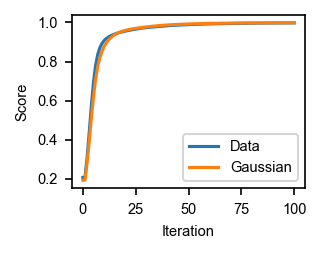

In [ ]:
plt.figure(figsize=(2, 1.5), dpi=150)
plt.plot(res.scores, label="Data")
plt.plot(res_gaussian.scores, label="Gaussian")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.legend()
plt.show()

Analyze the results (might take a few minutes)

Measure: cka
Iter 0, score: 0.21400207620716954
Iter 10, score: 0.914800382729198
Iter 20, score: 0.957786209515097
Iter 30, score: 0.9759527266814148
Iter 40, score: 0.9848065906171126
Iter 50, score: 0.9902075091844054
Iter 60, score: 0.9934999616746546
Iter 70, score: 0.9954589122644597
Iter 80, score: 0.9967188474397779
Iter 90, score: 0.997542123996092
Final score 0.9980720902528771
Iter 0, score: 0.23652980014140515
Iter 10, score: 0.9074320304815519
Iter 20, score: 0.9557598984326536
Iter 30, score: 0.9740812301922308
Iter 40, score: 0.9835355126890645
Iter 50, score: 0.9893522737533674
Iter 60, score: 0.9929390992256137
Iter 70, score: 0.9950652421948258
Iter 80, score: 0.9963831476584992
Iter 90, score: 0.997263818032226
Final score 0.9978266214332971
Measure: nbs
Iter 0, score: 0.5135329043527452
Iter 10, score: 0.9204956487976903
Iter 20, score: 0.987724957911469
Iter 30, score: 0.995906467850879
Iter 40, score: 0.9983206862906795
Iter 50, score: 0.9993802611181426
Iter 60, 

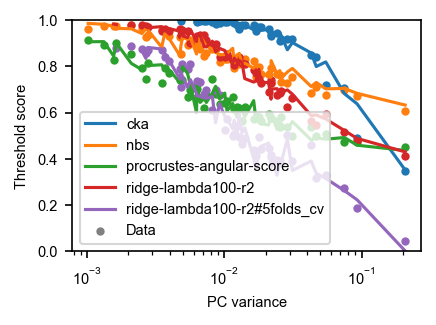

In [ ]:
from diffscore.analysis.captured_pcs import pc_captured_variance
from dataclasses import dataclass

@dataclass
class PCResult:
    threshold_scores: np.ndarray
    pc_captured_variance: np.ndarray
    pc_variance: np.ndarray

def analyze_pc(res, save_dir=None) -> PCResult:
    pc_res = pc_captured_variance(res.X, res.Ys, res.scores, expl_var_ratio=True, save_dir=save_dir)
    return PCResult(
        threshold_scores=pc_res["scores_at_threshold"],
        pc_captured_variance=pc_res["pc_captured_variance"],
        pc_variance=pc_res["pc_explained_variance"]
    )

max_iter = 100
measures = [
    "cka",
    "nbs",
    "procrustes-angular-score",
    "ridge-lambda100-r2",
    # "ridge-lambda10-r2",
    # "ridge-lambda10-r2#5folds_cv",
    "ridge-lambda100-r2#5folds_cv",
]

results = {}
results_gaussian = {}
for measure in measures:
    print(f"Measure: {measure}")
    res = diffscore.optimize(dataset=X, measure=measure, max_iter=max_iter)
    res_gaussian = diffscore.optimize(dataset=X, measure=measure, max_iter=max_iter)

    pc_res = analyze_pc(res)
    pc_res_gaussian = analyze_pc(res_gaussian)
    results[measure] = pc_res
    results_gaussian[measure] = pc_res_gaussian
    plt.close('all')
    # diffscore.analyze_decoding()
    # diffscore.pipeline()

plt.figure(figsize=(3, 2), dpi=150)
for measure in measures:
    pc_res = results[measure]
    pc_res_gaussian = results_gaussian[measure]

    plt.scatter(pc_res.pc_variance, pc_res.threshold_scores, marker=".")
    plt.plot(pc_res_gaussian.pc_variance, pc_res_gaussian.threshold_scores, label=measure)

# grey dot for data
plt.scatter([], [], marker=".", label="Data", color="gray")
plt.xlabel("PC variance")
plt.ylabel("Threshold score")
plt.xscale("log")
plt.ylim(0, 1)
plt.legend()
plt.show()

### Optimizatizing square - comparing pairs of measures

Optimization target: (0.0, 0)
fit_measure is deprecated, use optimize instead
Iter 0, score: -0.6083027827982569
Iter 10, score: -0.1700076178593911
Iter 20, score: -0.08234268606185084
Iter 30, score: -0.0443160704112488
Iter 40, score: -0.02586745481344935
Final score -0.015912168354823564
Optimization target: (0.3333333333333333, 0)
fit_measure is deprecated, use optimize instead
Iter 0, score: -0.4493749063882337
Iter 10, score: -0.3069704225581675
Iter 20, score: -0.21240624623874754
Iter 30, score: -0.17810228506677506
Iter 40, score: -0.1658033529001408
Final score -0.1307654507218325
Optimization target: (0.6666666666666666, 0)
fit_measure is deprecated, use optimize instead
Iter 0, score: -0.782708239721567
Iter 10, score: -0.3874369627407972
Iter 20, score: -0.2772943010476431
Iter 30, score: -0.22306701493284498
Iter 40, score: -0.18871867985680246
Final score -0.17363766836934824
Optimization target: (1.0, 0)
fit_measure is deprecated, use optimize instead
Iter 0, score: -1

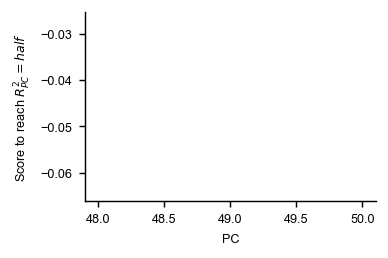

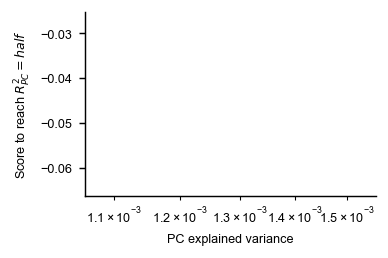

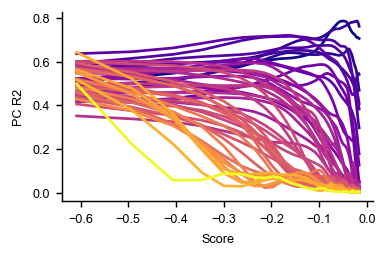

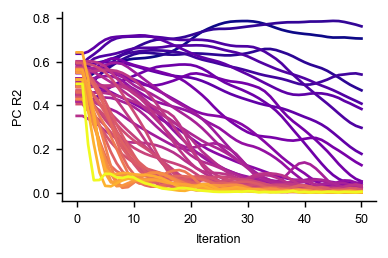

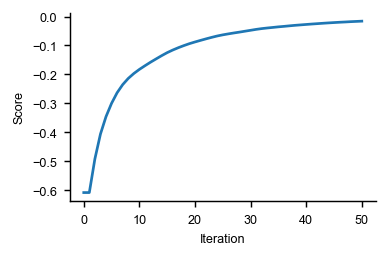

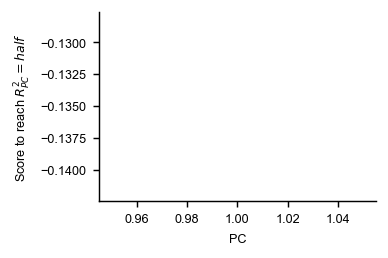

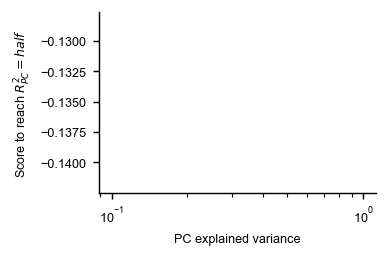

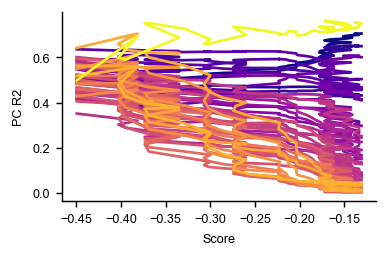

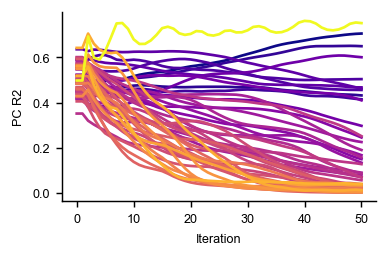

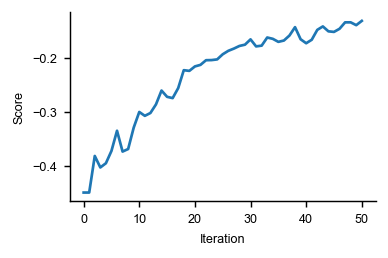

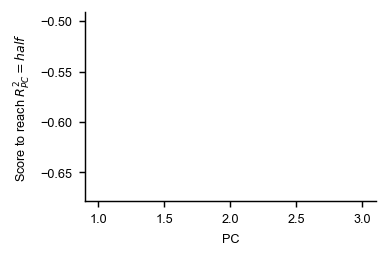

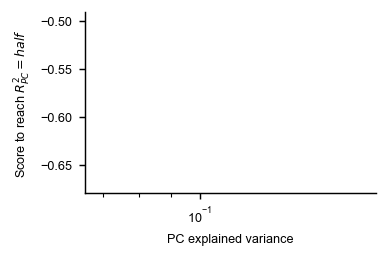

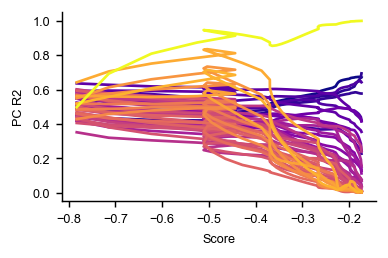

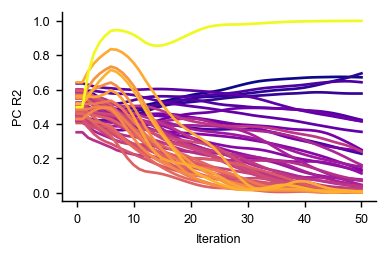

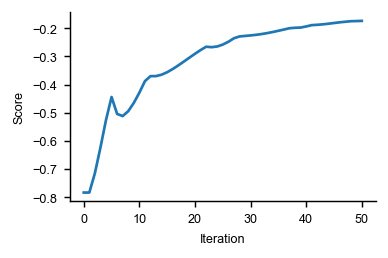

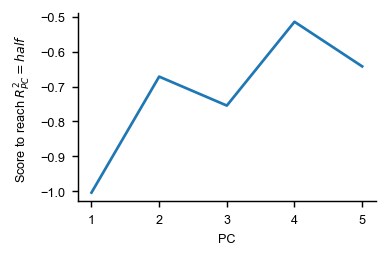

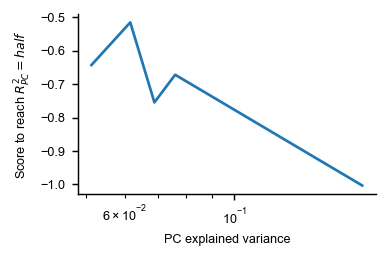

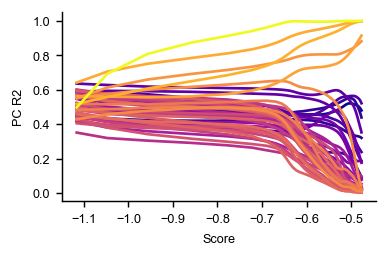

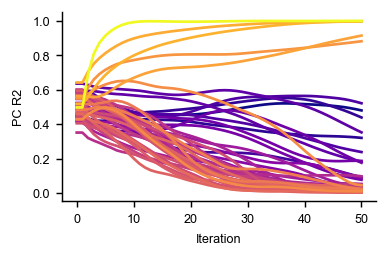

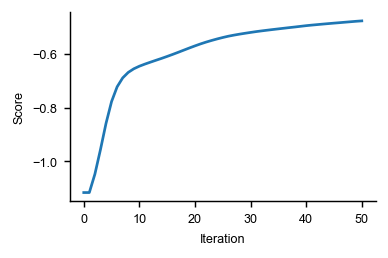

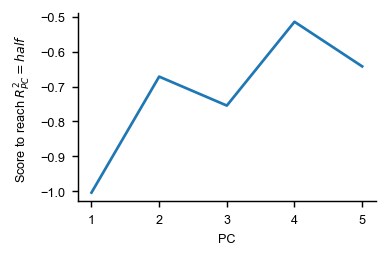

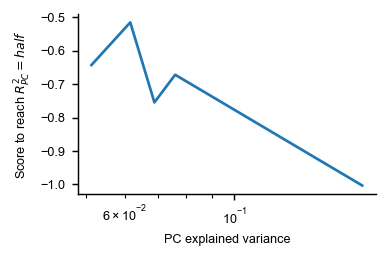

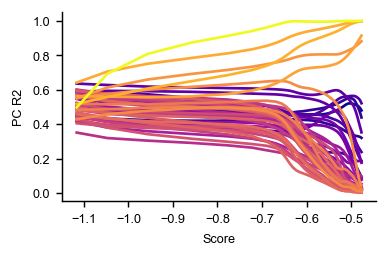

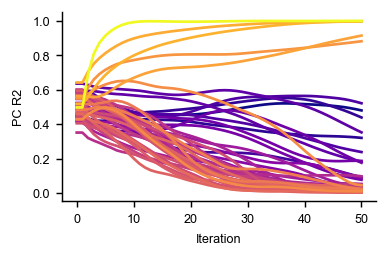

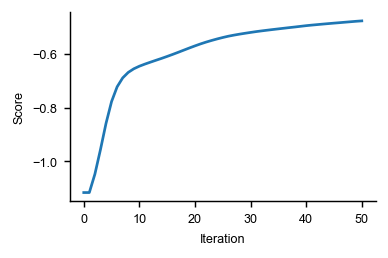

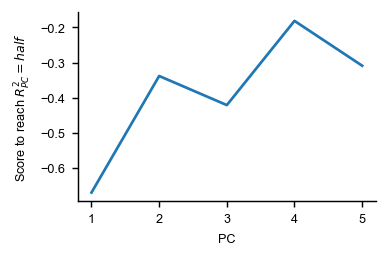

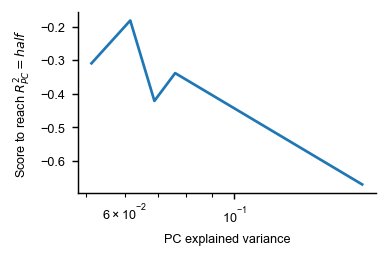

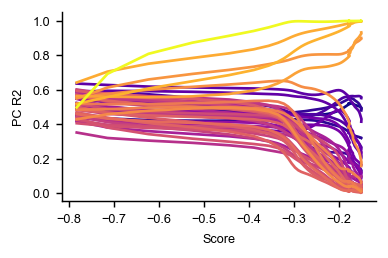

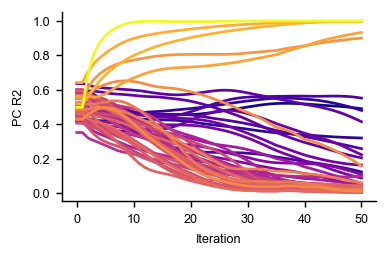

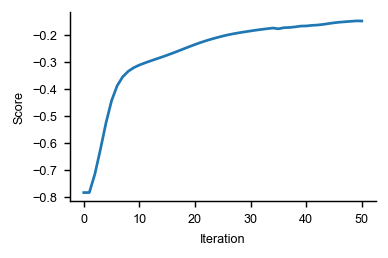

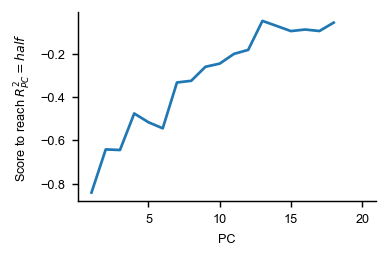

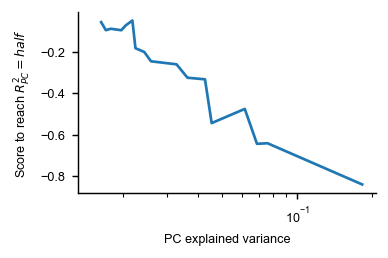

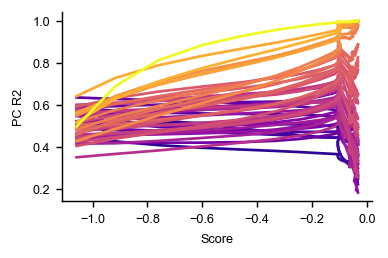

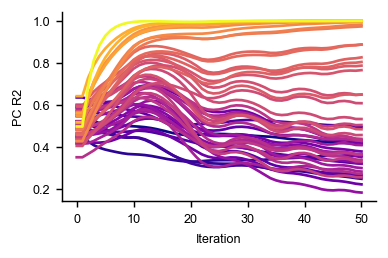

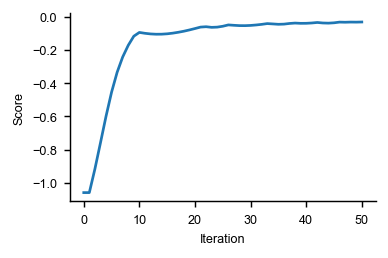

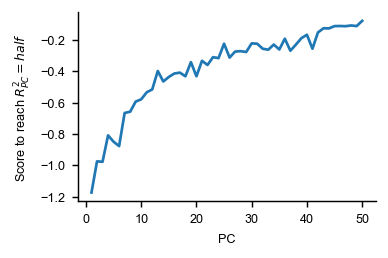

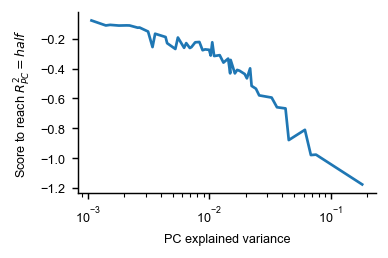

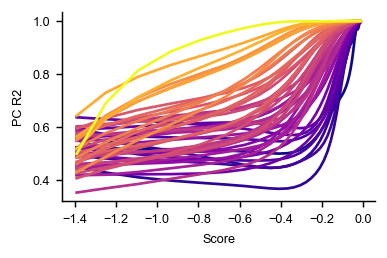

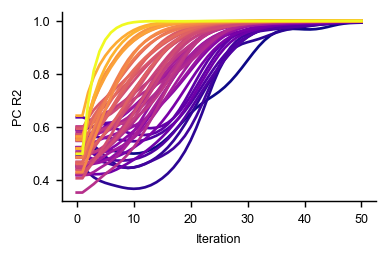

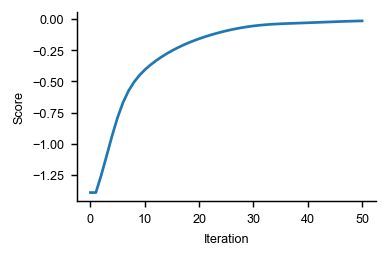

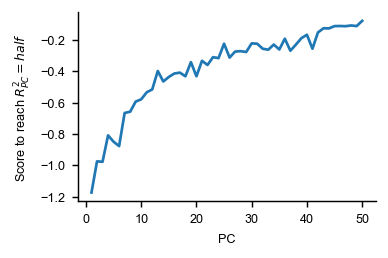

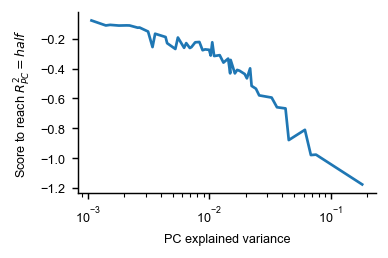

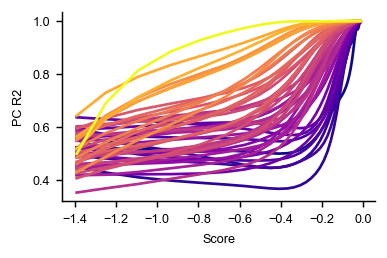

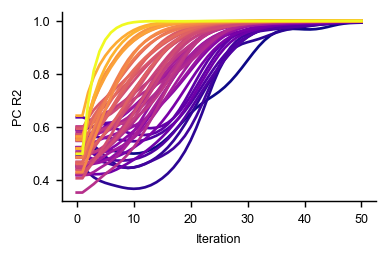

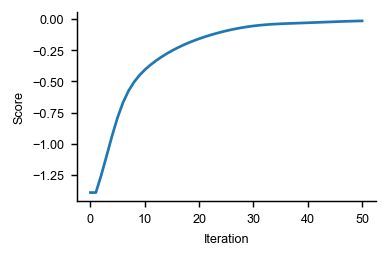

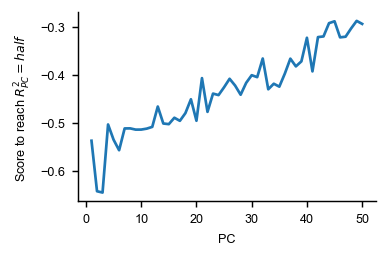

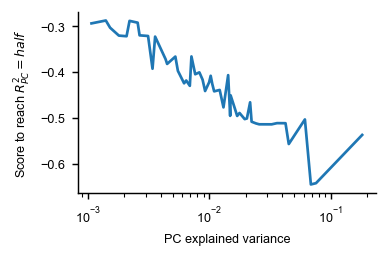

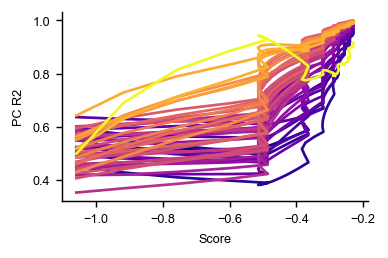

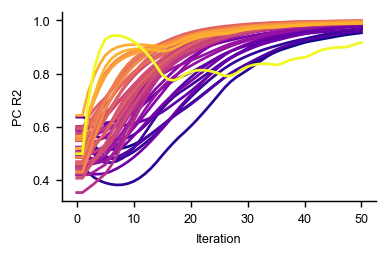

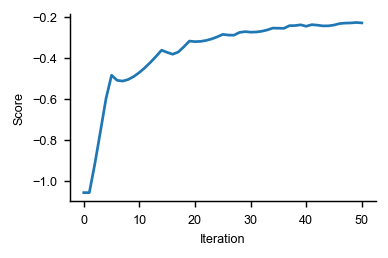

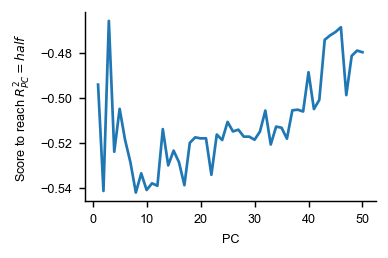

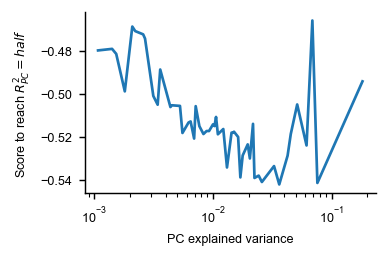

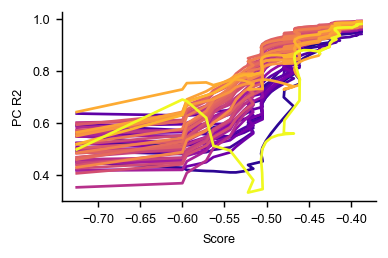

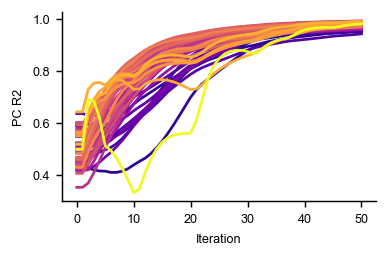

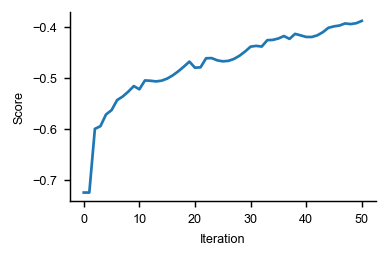

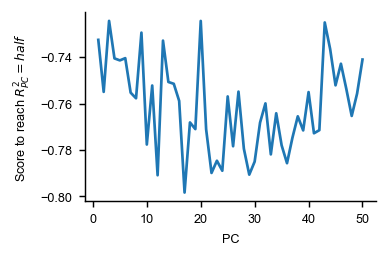

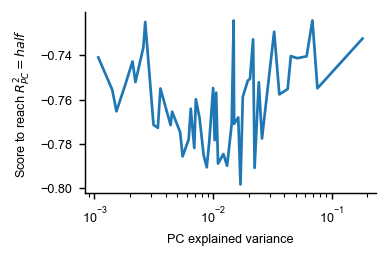

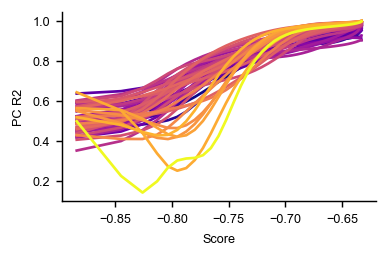

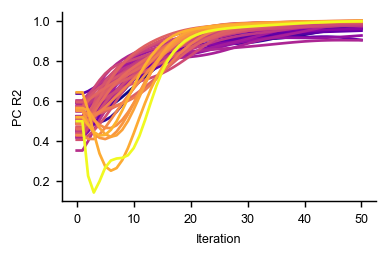

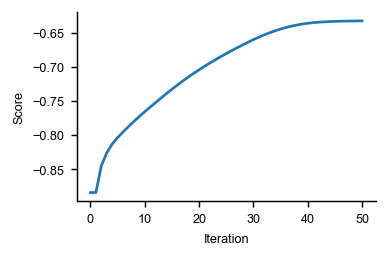

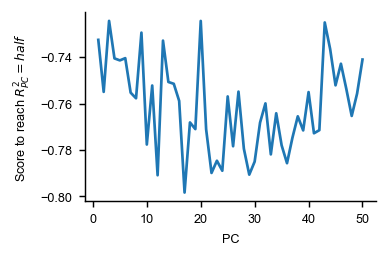

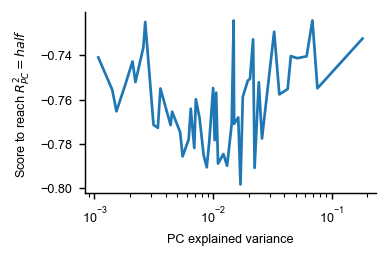

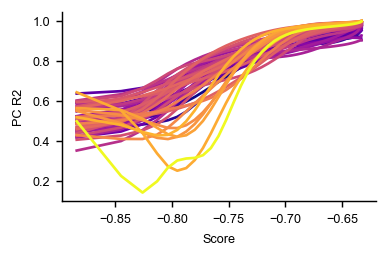

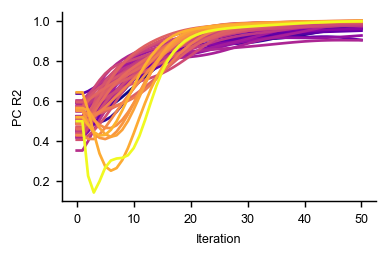

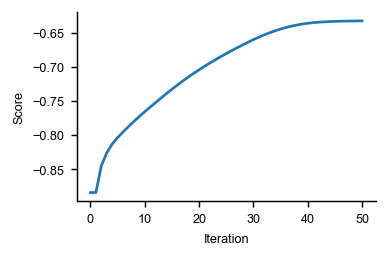

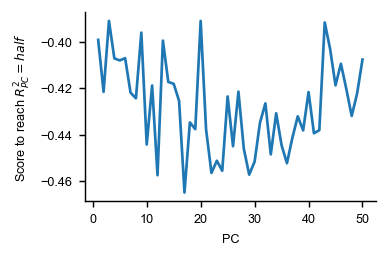

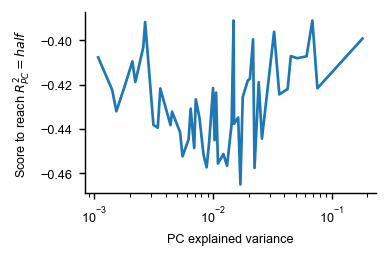

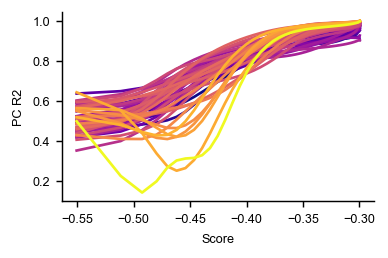

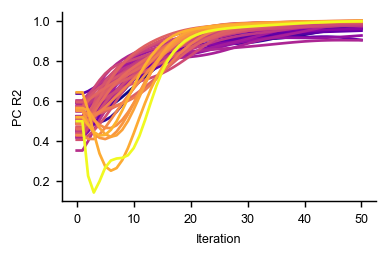

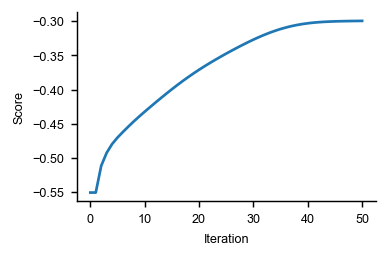

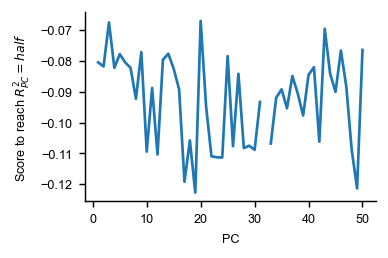

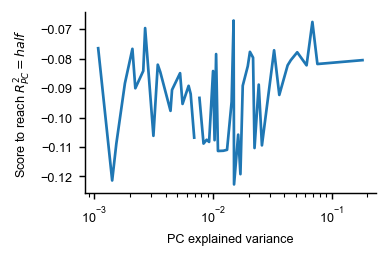

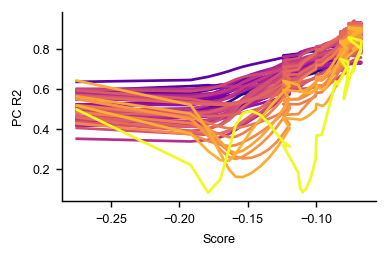

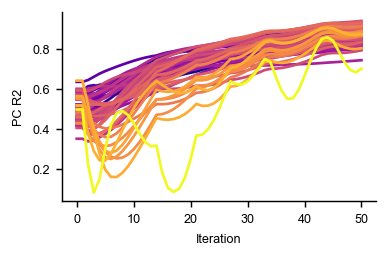

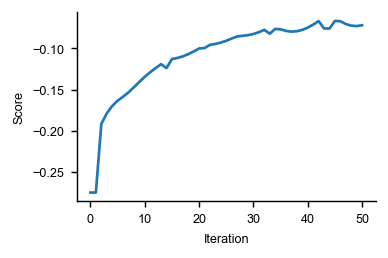

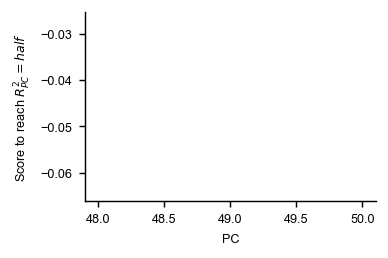

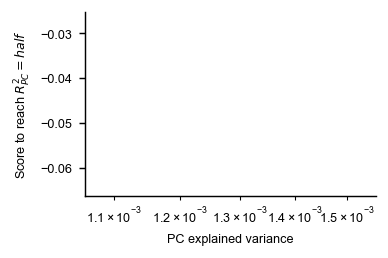

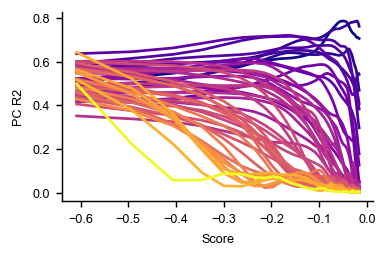

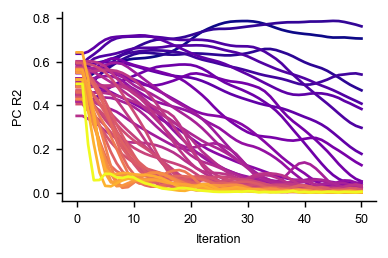

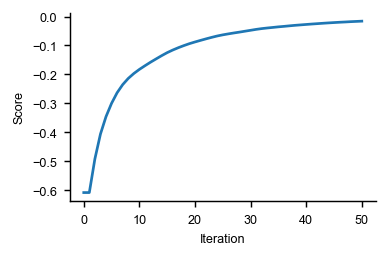

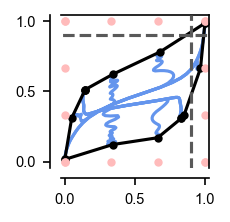

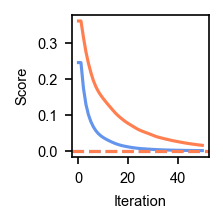

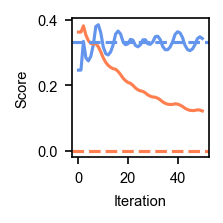

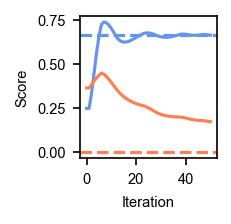

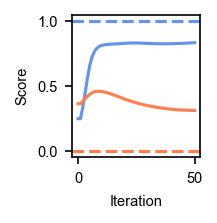

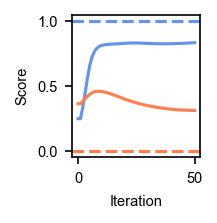

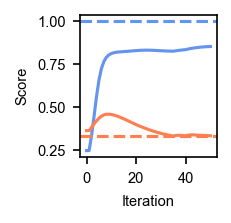

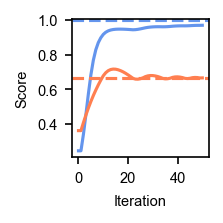

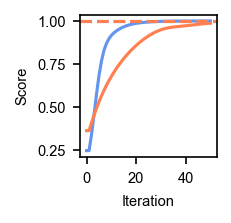

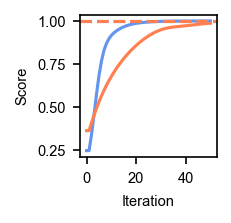

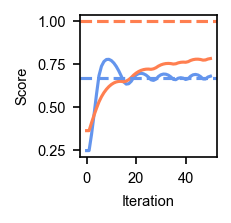

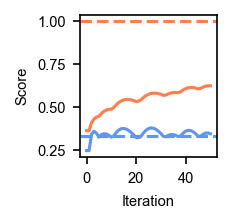

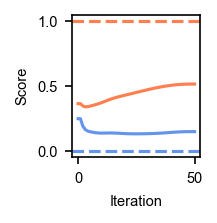

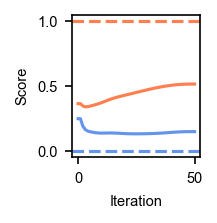

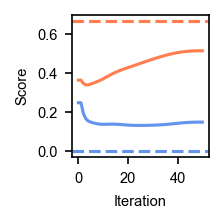

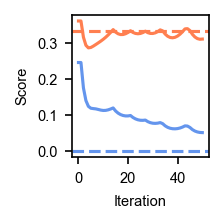

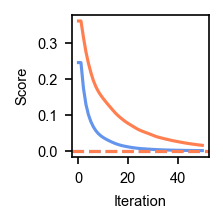

In [2]:
from diffscore.analysis.optim_square import square
import matplotlib.pyplot as plt

square("ultrametric", "cka", "procrustes-angular-score", 4, n_iter=50)
plt.show()